In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [53]:
data = pd .read_csv('voice.csv')
print(data.shape)

#data[data.label == 'male'] = 1
#data[data.label == 'female'] = 0

x = data.loc[:, data.columns != 'label']
y = data.loc[:,'label']

from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()
y=tf.keras.utils.to_categorical(lbl.fit_transform(y))


print(x.shape)
print(y.shape)

from sklearn.utils import shuffle
x, y = shuffle(x, y, random_state=1010101)


(3168, 21)
(3168, 20)
(3168, 2)


In [54]:
x_train = x[:int(len(x) * 0.8)]
y_train = y[:int(len(y) * 0.8)]
#x_validate = x[int(len(x) * 0.7) : int(len(x) * 0.9)]
#x_validate = y[int(len(y) * 0.7) : int(len(y) * 0.9)]
x_test = x[int(len(x) * 0.8):]
y_test = y[int(len(y) * 0.8):]

"""#lets convert the labels into unique integer
from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()
y_train=lbl.fit_transform(y_train)
y_test=lbl.fit_transform(y_test)"""


# Report shapes
print(f'x_train/y_train shape: {x_train.shape}/{y_train.shape}')
print(f'x_test/y_test shape: {x_test.shape}/{y_test.shape}')

x_train/y_train shape: (2534, 20)/(2534, 2)
x_test/y_test shape: (634, 20)/(634, 2)


In [47]:

inputs = tf.keras.layers.Input(shape=(20))
#x = tf.keras.layers.Dropout(0.1)(inputs)

x = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='random_normal')(inputs)
#x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(100, activation='relu', kernel_initializer='random_normal')(x)
#x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(2, activation='softmax', kernel_initializer='random_normal')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 20)]              0         
_________________________________________________________________
dense_21 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_22 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 202       
Total params: 6,352
Trainable params: 6,352
Non-trainable params: 0
_________________________________________________________________


In [48]:
#lrsched=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 if epoch <10 else(1e-4 if epoch < 20 else 1e-5))

h=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),)


# TF Keras needs data along rows, so we transpose with .T
#h = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test))
h = h.history

Train on 2534 samples, validate on 634 samples
Epoch 1/100
2534/2534 [==============================] - 1s 387us/sample - loss: 0.6817 - accuracy: 0.5572 - val_loss: 0.6703 - val_accuracy: 0.5110
Epoch 2/100
2534/2534 [==============================] - 0s 177us/sample - loss: 0.6804 - accuracy: 0.6626 - val_loss: 0.6510 - val_accuracy: 0.7114
Epoch 3/100
2534/2534 [==============================] - 0s 181us/sample - loss: 0.6028 - accuracy: 0.7028 - val_loss: 0.5330 - val_accuracy: 0.7618
Epoch 4/100
2534/2534 [==============================] - 0s 178us/sample - loss: 0.5443 - accuracy: 0.7482 - val_loss: 0.4953 - val_accuracy: 0.7760
Epoch 5/100
2534/2534 [==============================] - 1s 214us/sample - loss: 0.5094 - accuracy: 0.7751 - val_loss: 0.4840 - val_accuracy: 0.7839
Epoch 6/100
2534/2534 [==============================] - 1s 247us/sample - loss: 0.4799 - accuracy: 0.7916 - val_loss: 0.4506 - val_accuracy: 0.8170
Epoch 7/100
2534/2534 [==============================] - 1s

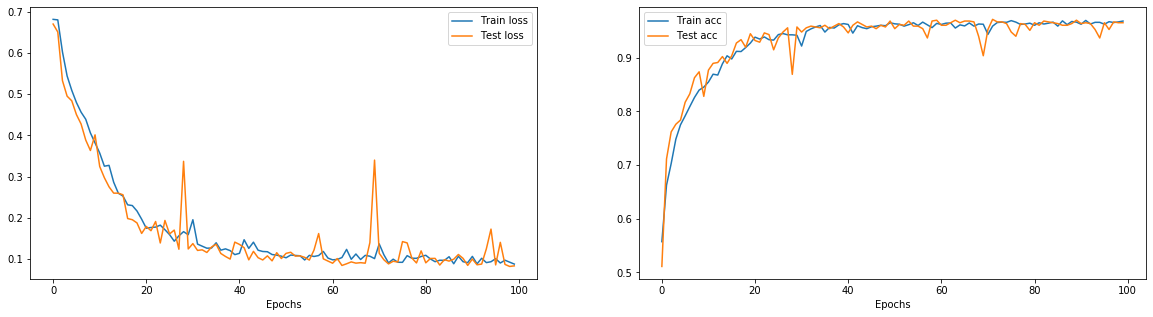

Final test accuracy: 0.965
Final test loss error: 0.083
Final train accuracy: 0.968
Final train loss error: 0.088


In [49]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(h['loss'], label='Train loss')
plt.plot(h['val_loss'], label='Test loss')
plt.xlabel('Epochs')
plt.legend()
plt.subplot(122)
plt.plot(h['accuracy'], label='Train acc')
plt.plot(h['val_accuracy'], label='Test acc')
plt.xlabel('Epochs')
plt.legend()
plt.show()
print(f'Final test accuracy: {h["val_accuracy"][-1]:.3f}')
print(f'Final test loss error: {h["val_loss"][-1]:.3f}')
print(f'Final train accuracy: {h["accuracy"][-1]:.3f}')
print(f'Final train loss error: {h["loss"][-1]:.3f}')

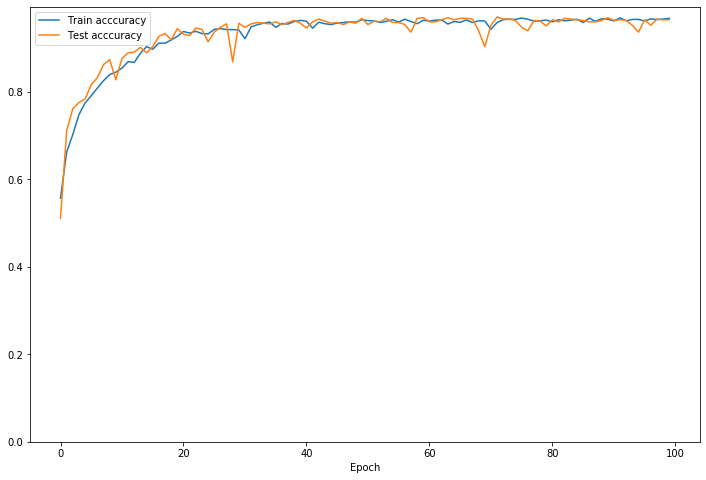

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(h['accuracy'], label='Train acccuracy')
plt.plot(h['val_accuracy'], label='Test acccuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylim(bottom=0)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [55]:
z = []
#g = np.array([])
print(x.shape[0])
x = np.array(x)
for i in range(x.shape[0]):
    print(x[i,])
    g =x[i:i+1,].reshape((4,5))
    g = np.vstack([g, [0,0,0,0,0]]).reshape((5,5,1))
    #print(g.shape)
    z.append(g)

z = np.array(z)
print(z.shape)

x_train = z[:int(len(x) * 0.8)]
x_test = z[int(len(x) * 0.8):]

3168
[ 0.18395871  0.06445892  0.2030312   0.14977712  0.23132244  0.08154532
  2.73289614 11.36730514  0.92856386  0.62096907  0.20053492  0.18395871
  0.16679731  0.04738401  0.26815642  1.35738032  0.0234375   8.625
  8.6015625   0.0975857 ]
[0.21779997 0.04579915 0.22426384 0.20414605 0.24240283 0.03825677
 2.17507765 7.66899426 0.86869279 0.25695906 0.23267373 0.21779997
 0.22341705 0.01302083 0.27777778 0.51778158 0.21484375 0.82519531
 0.61035156 0.43555556]
[1.46399040e-01 7.94014406e-02 1.25088757e-01 1.06863905e-01
 2.23502959e-01 1.16639053e-01 8.71584241e+00 1.59693400e+02
 9.11479479e-01 5.31648193e-01 0.00000000e+00 1.46399040e-01
 1.21129640e-01 1.62601626e-02 2.62295082e-01 6.20013298e-02
 7.81250000e-03 2.42187500e-01 2.34375000e-01 2.50724638e-01]
[0.22307736 0.03726989 0.23067961 0.2015534  0.25398058 0.05242718
 1.61570833 4.96915752 0.88657057 0.15844221 0.20724919 0.22307736
 0.14421628 0.04357708 0.275625   1.13359891 0.0215332  8.39794922
 8.37641602 0.1155527 ]

 3.484375   0.3327728 ]
[0.12945253 0.08085998 0.11312187 0.0603005  0.2145576  0.1542571
 0.32603303 2.26943222 0.9686231  0.75829739 0.21502504 0.12945253
 0.10621749 0.01853998 0.13793103 0.65917969 0.0703125  5.1015625
 5.03125    0.15496894]
[0.18526983 0.05897891 0.16821918 0.12931507 0.24383562 0.11452055
 1.42729077 4.47790503 0.89291735 0.32122651 0.24383562 0.18526983
 0.12377071 0.047105   0.27428571 1.38774671 0.0234375  6.375
 6.3515625  0.13591636]
[0.14623194 0.08685392 0.17203156 0.05467456 0.22477318 0.17009862
 0.96137903 3.20552451 0.9657112  0.75165547 0.23830375 0.14623194
 0.17603316 0.03018868 0.24615385 0.38333333 0.0078125  0.9765625
 0.96875    0.33870968]
[0.18850513 0.04525359 0.1816544  0.15679515 0.22009528 0.06330013
 1.6673566  6.35483145 0.91630326 0.3216828  0.16297964 0.18850513
 0.15457973 0.01584158 0.25396825 0.45186492 0.140625   2.609375
 2.46875    0.1011528 ]
[0.19137372 0.04244021 0.1910403  0.16204311 0.22043112 0.058388
 1.83614497 7.1111282

 4.546875   0.09333187]
[1.41132927e-01 8.04440400e-02 1.76173570e-01 5.82642998e-02
 1.97712032e-01 1.39447732e-01 2.81034632e+00 1.34419970e+01
 9.47771558e-01 6.85224055e-01 1.91637081e-01 1.41132927e-01
 1.76764804e-01 4.43213296e-02 2.53968254e-01 4.71484375e-01
 7.81250000e-03 2.98437500e+00 2.97656250e+00 1.83865175e-01]
[0.14115345 0.08092219 0.12430493 0.09715247 0.22224215 0.12508969
 1.72429784 6.31351651 0.9499589  0.64665305 0.10939462 0.14115345
 0.11729784 0.01886792 0.25806452 0.63961694 0.0078125  4.0625
 4.0546875  0.18723008]
[0.19414991 0.05864699 0.21856916 0.13621622 0.24750397 0.11128776
 1.54224896 4.91415126 0.88575778 0.27419902 0.25284579 0.19414991
 0.13379664 0.04948454 0.27428571 0.67724609 0.140625   4.921875
 4.78125    0.06265985]
[0.18090987 0.06245817 0.18217949 0.13461538 0.22974359 0.09512821
 0.91131825 3.41486311 0.94017276 0.55479901 0.22211538 0.18090987
 0.11597458 0.03712297 0.23529412 0.98115809 0.1015625  6.6875
 6.5859375  0.21344899]
[1.49

  5.8828125   0.13075697]
[0.20009697 0.04553316 0.20379646 0.1765809  0.23213265 0.05555174
 1.16019666 3.73381546 0.91960728 0.35714422 0.17690109 0.20009697
 0.16853074 0.06324111 0.26229508 0.71875    0.1484375  7.
 6.8515625  0.09220829]
[0.16217323 0.06188392 0.18082372 0.10263591 0.21588138 0.11324547
 2.00326219 6.80119219 0.90363229 0.394809   0.09179572 0.16217323
 0.09396114 0.01367989 0.11235955 0.36783854 0.08789062 0.75683594
 0.66894531 0.52518248]
[ 0.15147218  0.05807241  0.14363771  0.09998515  0.19913883  0.09915367
  3.13233843 14.48729255  0.89819762  0.4197433   0.10019302  0.15147218
  0.10264505  0.03597122  0.25641026  0.56241122  0.09277344  2.1875
  2.09472656  0.28275058]
[0.13654499 0.07988563 0.12941036 0.08638475 0.20745682 0.12107207
 1.34948827 5.0865868  0.96836709 0.76279558 0.01083979 0.13654499
 0.1077642  0.01612903 0.27586207 0.328125   0.0078125  4.9453125
 4.9375     0.08670886]
[0.1843094  0.04314487 0.18698413 0.16984127 0.21079365 0.04095238


 3.28125    0.14857143]
[0.16773174 0.06622478 0.17188612 0.11259786 0.22519573 0.11259786
 0.82298147 3.10328243 0.95321008 0.63464797 0.17338078 0.16773174
 0.12610686 0.04809619 0.27906977 0.81361607 0.0234375  6.0234375
 6.         0.12338362]
[1.59183719e-01 5.72329865e-02 1.70284302e-01 1.52632880e-01
 1.81186650e-01 2.85537701e-02 7.02159052e+00 6.35412564e+01
 8.78212815e-01 4.82172491e-01 1.70803461e-01 1.59183719e-01
 1.50485217e-01 1.07066381e-02 2.12765957e-01 1.76478795e-01
 3.41796875e-02 4.24804688e-01 3.90625000e-01 9.25925926e-02]
[ 0.13954633  0.07024778  0.12735543  0.08842105  0.1948538   0.10643275
  2.11453735 10.0704988   0.96429768  0.73037534  0.09533463  0.13954633
  0.10237061  0.03024575  0.27586207  0.42691532  0.0234375   2.5234375
  2.5         0.16916667]
[ 0.21864739  0.0333458   0.21914773  0.20125     0.240625    0.039375
  2.0358929   6.68708255  0.83488777  0.16601602  0.19806818  0.21864739
  0.18741949  0.04809619  0.27428571  0.78786058  0.023437

 8.2902832  0.1074274 ]
[1.69021004e-01 7.17781521e-02 1.43168483e-01 1.25800503e-01
 2.48315172e-01 1.22514669e-01 3.07927340e+00 1.43402988e+01
 9.02275256e-01 4.77745723e-01 1.28147527e-01 1.69021004e-01
 1.30598328e-01 1.58415842e-02 2.25352113e-01 3.35312500e-01
 7.81250000e-03 7.10937500e-01 7.03125000e-01 3.97354497e-01]
[1.68980689e-01 7.00647932e-02 1.91755319e-01 1.46702128e-01
 2.16888298e-01 7.01861702e-02 3.05519135e+00 2.68109640e+01
 9.32738361e-01 5.28959894e-01 0.00000000e+00 1.68980689e-01
 1.62058021e-01 1.57325467e-02 2.75862069e-01 1.15171371e-01
 7.81250000e-03 4.60937500e-01 4.53125000e-01 1.99507389e-01]
[0.19961953 0.04291482 0.20195354 0.16559857 0.22846933 0.06287076
 1.54604202 6.1439651  0.90986218 0.19023622 0.20378797 0.19961953
 0.1366428  0.02539683 0.27586207 1.1171875  0.1640625  6.015625
 5.8515625  0.12993515]
[0.21236919 0.0460244  0.22417178 0.18122699 0.24435583 0.06312883
 1.43168785 4.69787874 0.89781707 0.25024745 0.23619632 0.21236919
 0.1455

  9.5390625   0.10450831]
[ 0.15799258  0.05985528  0.16657097  0.09422648  0.19068581  0.09645933
  3.28800634 16.61327387  0.90159551  0.45440916  0.08440191  0.15799258
  0.0835621   0.01746725  0.22222222  0.52294922  0.1015625   2.4921875
  2.390625    0.23529412]
[1.10310689e-01 7.71342519e-02 1.03959218e-01 4.18691589e-02
 1.67952421e-01 1.26083263e-01 3.24493343e+00 2.77884023e+01
 9.54058516e-01 6.96183623e-01 0.00000000e+00 1.10310689e-01
 9.29515834e-02 1.75054705e-02 2.75862069e-01 7.40740741e-02
 7.81250000e-03 3.43750000e-01 3.35937500e-01 1.94418605e-01]
[ 0.18335769  0.03486528  0.18105263  0.17210526  0.19578947  0.02368421
  3.35034023 15.91799204  0.81736491  0.23387546  0.17578947  0.18335769
  0.17260696  0.08465608  0.24615385  0.859375    0.171875    6.0625
  5.890625    0.22100313]
[0.19116792 0.06248637 0.20363636 0.18535211 0.22909091 0.0437388
 2.11703004 7.18540986 0.908184   0.49798682 0.20148528 0.19116792
 0.16672217 0.04968944 0.27906977 1.24414062 0.023

 5.2109375  0.11272935]
[0.18900255 0.06145494 0.20237624 0.13544554 0.23485149 0.09940594
 1.62045146 6.37444233 0.92873507 0.47293367 0.2150495  0.18900255
 0.11445415 0.04785643 0.27118644 1.14799528 0.0234375  5.953125
 5.9296875  0.11968379]
[ 0.21170658  0.03590695  0.20755245  0.19502098  0.23613986  0.04111888
  3.11519434 15.41823258  0.84224786  0.22264614  0.1961958   0.21170658
  0.17017099  0.05309735  0.27906977  1.49782986  0.0234375   7.03125
  7.0078125   0.1297273 ]
[ 0.17690731  0.03047009  0.17605634  0.16478873  0.18647887  0.02169014
  2.77464317 10.40697235  0.81855223  0.19260621  0.18338028  0.17690731
  0.16873705  0.03703704  0.21621622  0.69320913  0.15625     6.84375
  6.6875      0.15065421]
[1.37654743e-01 8.44765967e-02 1.33981016e-01 7.26968174e-02
 2.22624232e-01 1.49927415e-01 3.99905167e+00 4.21255156e+01
 9.33737520e-01 5.75354600e-01 0.00000000e+00 1.37654743e-01
 1.48467075e-01 3.92156863e-02 2.71186441e-01 2.80273438e-01
 7.81250000e-03 4.4531250

[ 0.15876225  0.06399308  0.16438327  0.1037586   0.20988883  0.10613023
  2.31012305 10.43637056  0.93122281  0.51109783  0.10331392  0.15876225
  0.09038438  0.01619433  0.1509434   0.58614309  0.09375     4.9375
  4.84375     0.05949309]
[1.71986256e-01 5.39239845e-02 1.72335484e-01 1.54090323e-01
 2.01961290e-01 4.78709677e-02 3.10425990e+00 1.65148204e+01
 9.22053710e-01 5.25875021e-01 1.63122581e-01 1.71986256e-01
 1.50452396e-01 1.83823529e-02 2.70270270e-01 9.29612380e-01
 4.88281250e-03 3.79882812e+00 3.79394531e+00 3.43790219e-01]
[ 0.23279429  0.03822508  0.24339559  0.20536503  0.26526316  0.05989813
  1.92487879  6.34785084  0.8446924   0.1542483   0.25670628  0.23279429
  0.18519889  0.05111821  0.27745665  1.17896076  0.0234375  11.015625
 10.9921875   0.08463179]
[0.18714691 0.05945844 0.198236   0.13015495 0.22793802 0.09778308
 1.18741385 4.00173415 0.92574238 0.42813039 0.19856973 0.18714691
 0.123698   0.04752475 0.27745665 0.45438508 0.0234375  1.8046875
 1.78125  

 6.3671875  0.0602454 ]
[ 0.209111    0.03711103  0.21031484  0.19352324  0.22794603  0.03442279
  2.90975155 12.88930353  0.84744844  0.24505237  0.21031484  0.209111
  0.17662809  0.047105    0.27906977  1.84056122  0.0234375   8.6015625
  8.578125    0.1387233 ]
[0.20425926 0.04278168 0.19413333 0.18044444 0.23976296 0.05931852
 2.33231501 9.45276675 0.87763929 0.23542075 0.18044444 0.20425926
 0.15466802 0.04743083 0.27906977 1.59890625 0.0234375  8.25
 8.2265625  0.1178221 ]
[0.13635787 0.08146478 0.12006861 0.07156089 0.21724414 0.14568325
 1.90920157 7.55040852 0.95870687 0.7170756  0.11190395 0.13635787
 0.10943673 0.02753873 0.25806452 0.40966797 0.0078125  3.9921875
 3.984375   0.07437458]
[0.19494062 0.04254918 0.1952451  0.17946078 0.22063725 0.04117647
 2.13896709 7.87184395 0.87433842 0.32251798 0.18906863 0.19494062
 0.17513361 0.05351171 0.26815642 1.09227594 0.1875     5.4609375
 5.2734375  0.11565657]
[1.59796975e-01 6.87317845e-02 1.64830805e-01 1.25624271e-01
 2.059

 10.875       0.16608297]
[ 0.18993565  0.05570989  0.19916522  0.18406957  0.21669565  0.03262609
  3.41835397 16.59484908  0.86272034  0.3687066   0.1981913   0.18993565
  0.17585099  0.04747774  0.27272727  1.11672794  0.0234375   8.390625
  8.3671875   0.06612645]
[ 0.18289976  0.06198129  0.18262895  0.13510815  0.241797    0.10668885
  1.25776323  4.4967994   0.9278148   0.44332298  0.17331115  0.18289976
  0.12743474  0.04738401  0.27906977  1.46075581  0.0234375  11.15625
 11.1328125   0.08952909]
[ 0.21662125  0.04222776  0.22892388  0.20062992  0.2392126   0.03858268
  3.6108517  20.50661997  0.8527411   0.28399143  0.23553806  0.21662125
  0.15802148  0.048583    0.27906977  2.22881611  0.0234375   9.9140625
  9.890625    0.12241605]
[1.90251435e-01 3.23078717e-02 1.84379786e-01 1.69229199e-01
 2.05247575e-01 3.60183767e-02 2.29694149e+00 8.37015737e+00
 8.64841665e-01 1.25105142e-01 1.73374170e-01 1.90251435e-01
 1.41820397e-01 1.73160173e-02 2.75862069e-01 6.53320312e-01
 

 7.2421875  0.12732316]
[0.21534626 0.04503018 0.21413978 0.18177419 0.25741935 0.07564516
 1.19686741 3.52173463 0.8890382  0.21229958 0.27172043 0.21534626
 0.15930282 0.05106383 0.27118644 1.34472656 0.0234375  6.5390625
 6.515625   0.11887633]
[0.18767376 0.03595142 0.18893204 0.17058252 0.2042233  0.03364078
 2.05085159 6.77905203 0.86446796 0.25245374 0.19165049 0.18767376
 0.15939144 0.05122732 0.27745665 0.95677923 0.0234375  7.0546875
 7.03125    0.10718391]
[0.18610091 0.05740756 0.18138686 0.13029197 0.23810219 0.10781022
 1.18795435 3.83677712 0.90465608 0.31556661 0.12773723 0.18610091
 0.1354102  0.04968944 0.27906977 1.53966346 0.0234375  6.4453125
 6.421875   0.10390726]
[0.18345974 0.06864809 0.18321812 0.12915375 0.2549702  0.12581645
 1.73865494 6.20562321 0.92571268 0.50812879 0.13048868 0.18345974
 0.12833304 0.04833837 0.27906977 0.669375   0.0234375  4.3359375
 4.3125     0.0892663 ]
[0.18892225 0.04395991 0.17942105 0.16615789 0.20373684 0.03757895
 2.48891614 9

 3.4140625  0.16650321]
[0.18509844 0.05428944 0.17677189 0.14642049 0.21662895 0.07020846
 1.60173918 5.22378633 0.91032092 0.35802307 0.16526504 0.18509844
 0.13098333 0.01616162 0.26666667 0.56828704 0.0078125  5.140625
 5.1328125  0.09582699]
[1.82855441e-01 6.77888838e-02 2.00638723e-01 1.75489022e-01
 2.26067864e-01 5.05788423e-02 3.00188998e+00 1.98654818e+01
 9.10458130e-01 5.06098877e-01 5.00199601e-02 1.82855441e-01
 1.59590352e-01 1.87134503e-02 2.66666667e-01 2.58969907e-01
 5.46875000e-02 8.04687500e-01 7.50000000e-01 2.69230769e-01]
[0.18402643 0.03744645 0.17700637 0.16050955 0.20464968 0.04414013
 2.47038015 9.68806534 0.85653238 0.25235298 0.16095541 0.18402643
 0.17273782 0.04943357 0.27906977 1.10435268 0.0234375  8.15625
 8.1328125  0.08396293]
[1.64801332e-01 7.05586180e-02 1.75711061e-01 9.54401806e-02
 2.26907449e-01 1.31467269e-01 1.88496032e+01 4.59517292e+02
 9.20293747e-01 5.25147427e-01 6.00451467e-02 1.64801332e-01
 8.60937765e-02 1.63432074e-02 2.71186441e

 7.81250000e-03 5.31250000e-01 5.23437500e-01 7.72802653e-02]
[0.16354135 0.06163411 0.17157793 0.10787996 0.21548887 0.10760891
 1.42657822 5.24353591 0.9438968  0.56697464 0.17591481 0.16354135
 0.09489382 0.0174482  0.22857143 0.583125   0.0078125  5.4609375
 5.453125   0.17777501]
[0.20713576 0.04420933 0.21718799 0.17870458 0.23753555 0.05883096
 1.18508792 3.60676705 0.89787637 0.29070985 0.20701422 0.20713576
 0.17571222 0.047105   0.27906977 1.28613281 0.0234375  9.2578125
 9.234375   0.16328257]
[0.13462555 0.08440291 0.15453076 0.04559354 0.2091734  0.16357986
 1.14049732 3.92002585 0.96766357 0.75323753 0.19855811 0.13462555
 0.18153598 0.0208605  0.27118644 0.42363911 0.0078125  4.1640625
 4.15625    0.10213033]
[1.69310404e-01 5.54378674e-02 1.86980656e-01 1.21042893e-01
 2.11707317e-01 9.06644239e-02 2.66708816e+00 1.51271271e+01
 9.02347920e-01 3.51130452e-01 0.00000000e+00 1.69310404e-01
 1.15180750e-01 1.60965795e-02 2.75862069e-01 2.14133523e-01
 7.81250000e-03 6.3281

 8.953125   0.15350785]
[1.79749589e-01 3.40819284e-02 1.74082397e-01 1.67790262e-01
 1.87016230e-01 1.92259675e-02 4.99755148e+00 3.41367643e+01
 8.00227500e-01 2.23222936e-01 1.73732834e-01 1.79749589e-01
 1.64371027e-01 1.57016683e-02 2.25352113e-01 8.98828125e-01
 1.64062500e-01 6.62500000e+00 6.46093750e+00 1.39258364e-01]
[1.43704465e-01 7.42831495e-02 1.21739130e-01 1.03548226e-01
 2.16191904e-01 1.12643678e-01 1.24010639e+01 2.92575236e+02
 9.00217004e-01 4.76887224e-01 0.00000000e+00 1.43704465e-01
 1.12336208e-01 1.65118679e-02 2.75862069e-01 4.16193182e-02
 7.81250000e-03 2.34375000e-01 2.26562500e-01 2.00510856e-01]
[0.19188705 0.05166497 0.18909648 0.15693721 0.23540582 0.07846861
 1.04971785 3.93143974 0.92075968 0.37922303 0.18309342 0.19188705
 0.11858975 0.04696673 0.27586207 1.33237092 0.140625   8.9296875
 8.7890625  0.09803175]
[ 0.15872399  0.07452995  0.15952024  0.09697151  0.2292054   0.13223388
  1.11200476  5.4193014   0.97386745  0.71752878  0.25313343  0.158

[0.20451797 0.06856914 0.21602649 0.19222958 0.25527594 0.06304636
 1.91854262 7.53712623 0.8969188  0.40958343 0.05006623 0.20451797
 0.16307719 0.01675393 0.27586207 0.205      0.046875   0.7578125
 0.7109375  0.23534799]
[0.19598284 0.04316224 0.18924138 0.16558621 0.22882759 0.06324138
 1.74091297 6.55562336 0.88762745 0.30253346 0.18151724 0.19598284
 0.1588652  0.04863222 0.27745665 0.47389482 0.0234375  1.0078125
 0.984375   0.22200772]
[1.21726569e-01 7.73947768e-02 1.08818661e-01 5.33032355e-02
 2.00677201e-01 1.47373965e-01 3.53952046e+00 3.32428323e+01
 9.53773846e-01 6.72604982e-01 0.00000000e+00 1.21726569e-01
 1.09023798e-01 1.79573513e-02 2.62295082e-01 8.06308962e-02
 7.81250000e-03 2.34375000e-01 2.26562500e-01 1.87820983e-01]
[0.1655983  0.05919105 0.17584416 0.11090909 0.20961039 0.0987013
 1.30079364 5.03157082 0.9405228  0.5297815  0.19844156 0.1655983
 0.09073123 0.01576355 0.17204301 1.14789871 0.09375    6.90625
 6.8125     0.21309797]
[0.19554313 0.05793782 0.2

 7.6640625  0.08776047]
[ 0.21011383  0.02599892  0.21084629  0.20165803  0.21906736  0.01740933
  3.37806716 14.84066649  0.78611014  0.14184827  0.21229706  0.21011383
  0.18143397  0.0483871   0.27745665  1.61664244  0.2109375   8.5078125
  8.296875    0.15601912]
[ 0.16482457  0.07167608  0.17873638  0.09882353  0.21045752  0.11163399
  3.17326081 18.18407217  0.93524688  0.64271513  0.18788671  0.16482457
  0.12656098  0.04747774  0.27586207  0.56176758  0.09375     3.328125
  3.234375    0.0949793 ]
[0.23709305 0.03484541 0.2437037  0.21897436 0.26165242 0.04267806
 1.82627698 5.66376467 0.83182084 0.16705161 0.24928775 0.23709305
 0.1878561  0.05052632 0.27906977 0.99285239 0.0234375  7.78125
 7.7578125  0.1143001 ]
[0.23756833 0.03100774 0.23957616 0.22622517 0.25700662 0.03078146
 2.542153   9.44482242 0.80248735 0.1349409  0.22919205 0.23756833
 0.21020192 0.04958678 0.27906977 0.79304847 0.0234375  8.90625
 8.8828125  0.08081242]
[0.2155363  0.03920088 0.20747253 0.19384615 

[1.52414448e-01 1.07861762e-01 2.04427861e-01 3.48258706e-04
 2.41343284e-01 2.40995025e-01 2.17616090e+01 5.13879648e+02
 7.71160069e-01 2.71657028e-01 0.00000000e+00 1.52414448e-01
 1.52977222e-01 1.60000000e-02 2.66666667e-01 7.81250000e-03
 7.81250000e-03 7.81250000e-03 0.00000000e+00 0.00000000e+00]
[2.25012418e-01 4.85239814e-02 2.38648766e-01 2.22156778e-01
 2.57202252e-01 3.50454742e-02 3.62309001e+00 2.14428980e+01
 8.58114077e-01 1.29618171e-01 2.35859680e-01 2.25012418e-01
 1.21583422e-01 1.93003619e-02 2.71186441e-01 1.09574855e+00
 2.42187500e-01 4.82812500e+00 4.58593750e+00 1.34457971e-01]
[0.160308   0.05892514 0.165      0.10366667 0.19766667 0.094
 1.42457422 4.94474979 0.93577077 0.53422314 0.187      0.160308
 0.08738548 0.0239521  0.20253165 0.6640625  0.0859375  3.6015625
 3.515625   0.29919192]
[0.17910099 0.06070084 0.16926316 0.12210526 0.23873684 0.11663158
 2.04489057 7.92034296 0.89261623 0.35005477 0.12210526 0.17910099
 0.11485995 0.04761905 0.26229508 1.0

 10.4296875   0.08063758]
[ 0.15175454  0.08944142  0.19851976  0.05934399  0.22583684  0.16649285
  2.60304302 13.20473282  0.95041302  0.68169908  0.21429773  0.15175454
  0.21268344  0.05405405  0.27586207  0.78417969  0.015625    3.5859375
  3.5703125   0.28242159]
[0.15872158 0.06070911 0.17115136 0.10087969 0.20194049 0.1010608
 1.53891732 5.2042911  0.93941907 0.58503134 0.098163   0.15872158
 0.09376204 0.01764057 0.27586207 0.39248512 0.0546875  3.703125
 3.6484375  0.13746279]
[ 0.2432663   0.0376535   0.25640194  0.22917342  0.26547812  0.0363047
  2.9253147  11.76728255  0.81130494  0.18115821  0.25640194  0.2432663
  0.1869629   0.05100956  0.27745665  1.59747869  0.0234375   9.65625
  9.6328125   0.11624088]
[1.67901403e-01 5.95371335e-02 1.55301328e-01 1.20122574e-01
 2.22798774e-01 1.02676200e-01 3.48782367e+00 1.91830312e+01
 8.91240266e-01 3.36755307e-01 1.21838611e-01 1.67901403e-01
 9.48170447e-02 2.11640212e-02 1.49532710e-01 2.58789062e-01
 7.81250000e-03 6.796875

 7.81250000e-03 6.97656250e+00 6.96875000e+00 9.03455553e-02]
[0.20206818 0.03654034 0.20169492 0.18542373 0.22271186 0.03728814
 2.38351621 8.64162987 0.86315418 0.2643356  0.22       0.20206818
 0.1694173  0.04701273 0.27906977 2.40378289 0.1875     9.4921875
 9.3046875  0.14322418]
[0.18871643 0.06591131 0.20184615 0.132      0.24953846 0.11753846
 1.74257722 7.1237764  0.93142988 0.52255967 0.26553846 0.18871643
 0.1217841  0.02295552 0.23529412 0.4575     0.125      3.6015625
 3.4765625  0.1261236 ]
[ 0.20474991  0.03700811  0.21009655  0.18924138  0.22554483  0.03630345
  2.79375783 11.23717577  0.84397708  0.26350575  0.19271724  0.20474991
  0.17449378  0.04943357  0.27906977  0.79926658  0.09375     6.046875
  5.953125    0.07555306]
[0.19658012 0.06412509 0.21253801 0.1948538  0.23480702 0.03995322
 2.39177205 8.52894377 0.88333979 0.39400337 0.23546199 0.19658012
 0.18574016 0.04968944 0.27586207 1.56696429 0.0234375  7.734375
 7.7109375  0.12642316]
[ 0.19477402  0.03026594

[0.16876299 0.06509931 0.18795699 0.11827957 0.21462366 0.09634409
 2.14076907 9.89802662 0.94894497 0.63639435 0.19311828 0.16876299
 0.12373195 0.04738401 0.27906977 0.62667411 0.0234375  2.3671875
 2.34375    0.12388889]
[1.82894613e-01 3.36303061e-02 1.85045317e-01 1.72990937e-01
 1.94984894e-01 2.19939577e-02 3.91459871e+00 2.25089401e+01
 8.28363104e-01 2.48624866e-01 1.84622356e-01 1.82894613e-01
 1.71047125e-01 2.51572327e-02 2.58064516e-01 9.02573529e-01
 1.64062500e-01 6.88281250e+00 6.71875000e+00 1.92107118e-01]
[0.20307998 0.06056068 0.22014641 0.13979502 0.25704246 0.11724744
 1.97632118 7.81341863 0.90283925 0.33425042 0.2566325  0.20307998
 0.12914005 0.04696673 0.26815642 1.63919005 0.0234375  8.015625
 7.9921875  0.09530792]
[1.19213317e-01 7.82857220e-02 1.03415409e-01 5.38204925e-02
 1.89483717e-01 1.35663225e-01 1.98550958e+00 8.39424800e+00
 9.62887030e-01 7.49296121e-01 9.80778396e-02 1.19213317e-01
 1.04030301e-01 1.82440137e-02 2.71186441e-01 4.66974432e-01
 7.

In [56]:
def create_model(regl1=0,regl2=0,drop=0):
    
    reg=tf.keras.regularizers.l1_l2(0,0)
    inputs=tf.keras.layers.Input(shape=(5,5,1))
    x=inputs
    
    x=tf.keras.layers.Conv2D(16,(3,3),padding='same',activation='relu',kernel_regularizer=reg)(x)
    #x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=1, data_format=None)(x)
    #x=tf.keras.layers.Dropout(0.25*drop)(x)
    
    x=tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',kernel_regularizer=reg)(x)
    #x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=1, data_format=None)(x)
    #x=tf.keras.layers.Dropout(0.35*drop)(x)
    
    x=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=reg)(x)
    #x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=1, data_format=None)(x)
    #x=tf.keras.layers.Dropout(0.5*drop)(x)
    
   # x=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer=reg)(x)
    #x=tf.keras.layers.BatchNormalization()(x)
    #x=tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=1, data_format=None)(x)
    #x=tf.keras.layers.Dropout(0.75*drop)(x)
    
    x=tf.keras.layers.Flatten()(x)
    logits=tf.keras.layers.Dense(2)(x)
    outputs=tf.keras.layers.Softmax()(logits)
    model=tf.keras.Model(inputs,outputs)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [57]:
model=create_model(drop=0.1)
model.summary()

lrsched=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 if epoch <10 else(1e-4 if epoch < 20 else 1e-5))

h=model.fit(x_train,y_train, epochs=100,validation_data=(x_test,y_test),)#callbacks=[lrsched])

h=h.history

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 5, 5, 1)]         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 5, 5, 16)          160       
_________________________________________________________________
average_pooling2d_24 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
average_pooling2d_25 (Averag (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
average_pooling2d_26 (Averag (None, 2, 2, 64)          0  

Epoch 44/200
2534/2534 [==============================] - 1s 461us/sample - loss: 0.1907 - accuracy: 0.9294 - val_loss: 0.1815 - val_accuracy: 0.9369
Epoch 45/200
2534/2534 [==============================] - 1s 472us/sample - loss: 0.1473 - accuracy: 0.9507 - val_loss: 0.1610 - val_accuracy: 0.9401
Epoch 46/200
2534/2534 [==============================] - 1s 458us/sample - loss: 0.1385 - accuracy: 0.9534 - val_loss: 0.1504 - val_accuracy: 0.9574
Epoch 47/200
2534/2534 [==============================] - 1s 491us/sample - loss: 0.1480 - accuracy: 0.9436 - val_loss: 0.1807 - val_accuracy: 0.9227
Epoch 48/200
2534/2534 [==============================] - 1s 462us/sample - loss: 0.1451 - accuracy: 0.9487 - val_loss: 0.1679 - val_accuracy: 0.9432
Epoch 49/200
2534/2534 [==============================] - 1s 457us/sample - loss: 0.1489 - accuracy: 0.9499 - val_loss: 0.1458 - val_accuracy: 0.9479
Epoch 50/200
2534/2534 [==============================] - 1s 485us/sample - loss: 0.1471 - accuracy:

2534/2534 [==============================] - 1s 423us/sample - loss: 0.1028 - accuracy: 0.9605 - val_loss: 0.1279 - val_accuracy: 0.9543
Epoch 153/200
2534/2534 [==============================] - 1s 455us/sample - loss: 0.0923 - accuracy: 0.9653 - val_loss: 0.2215 - val_accuracy: 0.9227
Epoch 154/200
2534/2534 [==============================] - 1s 442us/sample - loss: 0.0943 - accuracy: 0.9657 - val_loss: 0.1021 - val_accuracy: 0.9574
Epoch 155/200
2534/2534 [==============================] - 1s 426us/sample - loss: 0.0784 - accuracy: 0.9684 - val_loss: 0.1227 - val_accuracy: 0.9558
Epoch 156/200
2534/2534 [==============================] - 1s 448us/sample - loss: 0.0736 - accuracy: 0.9747 - val_loss: 0.1099 - val_accuracy: 0.9621
Epoch 157/200
2534/2534 [==============================] - 1s 443us/sample - loss: 0.0905 - accuracy: 0.9649 - val_loss: 0.3852 - val_accuracy: 0.8896
Epoch 158/200
2534/2534 [==============================] - 1s 464us/sample - loss: 0.1031 - accuracy: 0.9605

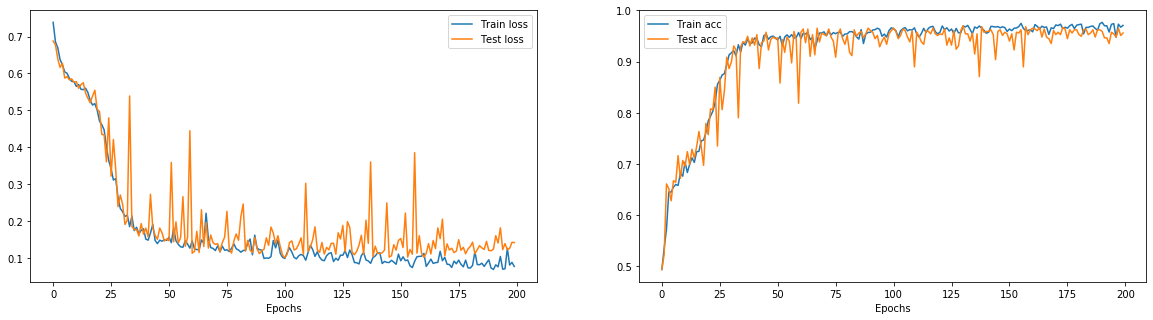

Final test accuracy: 0.956
Final test loss error: 0.141
Final train accuracy: 0.971
Final train loss error: 0.077


In [58]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(h['loss'], label='Train loss')
plt.plot(h['val_loss'], label='Test loss')
plt.xlabel('Epochs')
plt.legend()
plt.subplot(122)
plt.plot(h['accuracy'], label='Train acc')
plt.plot(h['val_accuracy'], label='Test acc')
plt.xlabel('Epochs')
plt.legend()
plt.show()
print(f'Final test accuracy: {h["val_accuracy"][-1]:.3f}')
print(f'Final test loss error: {h["val_loss"][-1]:.3f}')
print(f'Final train accuracy: {h["accuracy"][-1]:.3f}')
print(f'Final train loss error: {h["loss"][-1]:.3f}')